In [1]:
import numpy as np
import tensorflow as tf
from pathlib import Path

2023-06-14 12:48:27.982867: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.random.set_seed(69)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(
        tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal")
    )

In [3]:
# this adds an output layer with 10 neurons (one per class) using the softmax activation function
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [4]:
# we now want to use the Nadam optimizer with a learning rate of 5e-5
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)

In [5]:
# we now load the dataset that we want to use
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [6]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True
)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_cifar10_model/my_cifar10_model.h5", save_best_only=True
)
run_index = 1  # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [7]:
%load_ext tensorboard
%tensorboard --logdir=./my_cifar10_logs --port=6006

In [8]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks,
)

Epoch 1/100
1407/1407 [==============================] - 15s 6ms/step - loss: 4.0464 - accuracy: 0.1564 - val_loss: 2.2391 - val_accuracy: 0.2104
Epoch 2/100
1407/1407 [==============================] - 9s 6ms/step - loss: 2.1019 - accuracy: 0.2281 - val_loss: 2.0120 - val_accuracy: 0.2622
Epoch 3/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.9844 - accuracy: 0.2763 - val_loss: 1.9633 - val_accuracy: 0.2778
Epoch 4/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8985 - accuracy: 0.3079 - val_loss: 1.8913 - val_accuracy: 0.3128
Epoch 5/100
1407/1407 [==============================] - 9s 7ms/step - loss: 1.8340 - accuracy: 0.3347 - val_loss: 1.8385 - val_accuracy: 0.3328
Epoch 6/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7864 - accuracy: 0.3508 - val_loss: 1.7798 - val_accuracy: 0.3516
Epoch 7/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7385 - accuracy: 0.3727 - val_loss: 1.7421 - val_a

In [9]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.5334 - accuracy: 0.4564


[1.533409833908081, 0.4564000070095062]

In [10]:
# we want to improve this using batch normalization to see if we can train faster and better
tf.keras.backend.clear_session()
tf.random.set_seed(69)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True
)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_cifar10_model/my_cifar10_bn_model.h5", save_best_only=True
)
run_index = 1  # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_bn_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks,
)
model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 29s 10ms/step - loss: 2.0396 - accuracy: 0.2526 - val_loss: 2.0349 - val_accuracy: 0.2764
Epoch 2/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.7854 - accuracy: 0.3572 - val_loss: 2.0590 - val_accuracy: 0.2744
Epoch 3/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.6879 - accuracy: 0.3945 - val_loss: 1.7345 - val_accuracy: 0.3646
Epoch 4/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.6193 - accuracy: 0.4209 - val_loss: 1.7090 - val_accuracy: 0.3830
Epoch 5/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5681 - accuracy: 0.4420 - val_loss: 1.6668 - val_accuracy: 0.4024
Epoch 6/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.5173 - accuracy: 0.4569 - val_loss: 1.7030 - val_accuracy: 0.3978
Epoch 7/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.4743 - accuracy: 0.4745 - val_loss: 1.

[1.5007493495941162, 0.47540000081062317]

In [11]:
# we now want to use SELU activation function to see if we can train faster and better than before
tf.random.set_seed(69)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(
        tf.keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu")
    )

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True
)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_cifar10_model/my_cifar10_selu_model.h5", save_best_only=True
)
run_index = 1  # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_selu_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=callbacks,
)

model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 17s 7ms/step - loss: 1.9512 - accuracy: 0.2972 - val_loss: 1.8369 - val_accuracy: 0.3510
Epoch 2/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7420 - accuracy: 0.3813 - val_loss: 1.6836 - val_accuracy: 0.4022
Epoch 3/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6472 - accuracy: 0.4176 - val_loss: 1.6810 - val_accuracy: 0.4270
Epoch 4/100
1407/1407 [==============================] - 9s 7ms/step - loss: 1.5724 - accuracy: 0.4477 - val_loss: 1.6506 - val_accuracy: 0.4104
Epoch 5/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5193 - accuracy: 0.4660 - val_loss: 1.5704 - val_accuracy: 0.4460
Epoch 6/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4696 - accuracy: 0.4865 - val_loss: 1.5594 - val_accuracy: 0.4560
Epoch 7/100
1407/1407 [==============================] - 9s 7ms/step - loss: 1.4288 - accuracy: 0.5006 - val_loss: 1.5326 - v

[1.469991683959961, 0.5041999816894531]

In [12]:
# we now try the alpha dropout to see if we can train faster and better than before
tf.random.set_seed(69)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(
        tf.keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu")
    )

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True
)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_cifar10_model/my_cifar10_alpha_dropout_model.h5", save_best_only=True
)
run_index = 1  # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_alpha_dropout_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=callbacks,
)

model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 16s 7ms/step - loss: 1.8883 - accuracy: 0.3300 - val_loss: 1.7629 - val_accuracy: 0.3750
Epoch 2/100
1407/1407 [==============================] - 9s 7ms/step - loss: 1.6697 - accuracy: 0.4120 - val_loss: 1.6205 - val_accuracy: 0.4404
Epoch 3/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5795 - accuracy: 0.4456 - val_loss: 1.6522 - val_accuracy: 0.4392
Epoch 4/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5191 - accuracy: 0.4692 - val_loss: 1.5598 - val_accuracy: 0.4534
Epoch 5/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4690 - accuracy: 0.4868 - val_loss: 1.5695 - val_accuracy: 0.4714
Epoch 6/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4212 - accuracy: 0.5060 - val_loss: 1.5577 - val_accuracy: 0.4780
Epoch 7/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3725 - accuracy: 0.5199 - val_loss: 1.5424 - 

[1.5105043649673462, 0.5001999735832214]

In [13]:
# we now try MC Dropout to see if we can train faster and better than before
class MCAlphaDropout(tf.keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [14]:
# this is identical to the one we just trained but with MCAlphaDropout instead of AlphaDropout
mc_model = tf.keras.Sequential(
    [
        (
            MCAlphaDropout(layer.rate)
            if isinstance(layer, tf.keras.layers.AlphaDropout)
            else layer
        )
        for layer in model.layers
    ]
)

In [15]:
# these are utility functions to make predictions for the most likely class and for the class probabilities (using MC Dropout)
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)


def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return Y_probas.argmax(axis=1)

In [16]:
# this makes predictions for the validation set using MC Dropout and computes the accuracy
tf.random.set_seed(69)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = (y_pred == y_valid[:, 0]).mean()
accuracy

157/157 [==============================] - 0s 2ms/step


0.5004

In [17]:
# we are now going to train the model with 1cycle scheduling to see if it improves the training speed and accuracy
tf.random.set_seed(69)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(
        tf.keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu")
    )

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD()
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)

one cycle classes and functions

In [18]:
import math
import matplotlib.pyplot as plt

K = tf.keras.backend


class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_epoch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0

    def on_batch_end(self, batch, logs=None):
        mean_epoch_loss = logs["loss"]  # the epoch's mean loss so far
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(batch_loss)
        K.set_value(
            self.model.optimizer.learning_rate,
            self.model.optimizer.learning_rate * self.factor,
        )


class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(
        self, iterations, max_lr=1e-3, start_lr=None, last_iterations=None, last_lr=None
    ):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0, self.half_iteration, self.start_lr, self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(
                self.half_iteration, 2 * self.half_iteration, self.max_lr, self.start_lr
            )
        else:
            lr = self._interpolate(
                2 * self.half_iteration, self.iterations, self.start_lr, self.last_lr
            )
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, lr)


def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-4, max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = (max_rate / min_rate) ** (1 / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses


def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale("log")
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    plt.grid()

352/352 [==============================] - 5s 9ms/step - loss: nan - accuracy: 0.1824


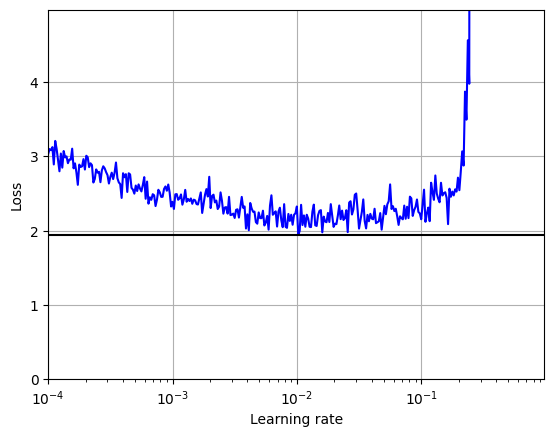

In [19]:
batch_size = 128
rates, losses = find_learning_rate(
    model, X_train_scaled, y_train, epochs=1, batch_size=batch_size
)
plot_lr_vs_loss(rates, losses)

In [20]:
tf.random.set_seed(69)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(
        tf.keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu")
    )

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD(learning_rate=2e-2)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)

In [21]:
n_epochs = 15
n_iterations = math.ceil(len(X_train_scaled) / batch_size) * n_epochs
onecycle = OneCycleScheduler(n_iterations, max_lr=0.05)
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=n_epochs,
    batch_size=batch_size,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=[onecycle],
)

Epoch 1/15
352/352 [==============================] - 5s 9ms/step - loss: 2.0634 - accuracy: 0.2882 - val_loss: 1.7610 - val_accuracy: 0.3760
Epoch 2/15
352/352 [==============================] - 3s 8ms/step - loss: 1.7543 - accuracy: 0.3780 - val_loss: 1.6619 - val_accuracy: 0.4230
Epoch 3/15
352/352 [==============================] - 3s 9ms/step - loss: 1.6198 - accuracy: 0.4280 - val_loss: 1.6560 - val_accuracy: 0.4236
Epoch 4/15
352/352 [==============================] - 3s 8ms/step - loss: 1.5404 - accuracy: 0.4540 - val_loss: 1.7117 - val_accuracy: 0.4304
Epoch 5/15
352/352 [==============================] - 3s 9ms/step - loss: 1.4977 - accuracy: 0.4699 - val_loss: 1.7762 - val_accuracy: 0.4112
Epoch 6/15
352/352 [==============================] - 3s 9ms/step - loss: 1.4554 - accuracy: 0.4845 - val_loss: 1.5989 - val_accuracy: 0.4472
Epoch 7/15
352/352 [==============================] - 3s 8ms/step - loss: 1.4199 - accuracy: 0.4948 - val_loss: 1.6201 - val_accuracy: 0.4582
Epoch 